## Hurricane Data

In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Here is the documentation for the dataset: https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/doc/ 

Load a CSV file of the NOAA IBTrACS hurricane dataset via the following commands:

In [4]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

SID  SEASON  NUMBER BASIN SUBBASIN NAME            ISO_TIME  \
0  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 03:00:00   
1  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 06:00:00   
2  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 09:00:00   
3  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 12:00:00   
4  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 15:00:00   

  NATURE      LAT      LON  WMO_WIND  WMO_PRES  
0     NR  10.9000  80.3000       NaN       NaN  
1     NR  10.8709  79.8265       NaN       NaN  
2     NR  10.8431  79.3524       NaN       NaN  
3     NR  10.8188  78.8772       NaN       NaN  
4     NR  10.8000  78.4000       NaN       NaN

(0) Basic questions to start with:

- Find out, what the different columns indicate and write down a legend.     
   - e.g. **Basin Key:** (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)
- How many rows does this dataset have?
- How many North Atlantic hurricanes are in this dataset?

In [5]:
#Number of records in dataset
df.shape

(700059, 12)

In [6]:
#Most recent records
df.tail()

SID  SEASON  NUMBER BASIN SUBBASIN NAME            ISO_TIME  \
700054  2021245N27160    2021      67    WP       MM  NaN 2021-09-03 06:00:00   
700055  2021245N27160    2021      67    WP       MM  NaN 2021-09-03 09:00:00   
700056  2021245N27160    2021      67    WP       MM  NaN 2021-09-03 12:00:00   
700057  2021245N27160    2021      67    WP       MM  NaN 2021-09-03 15:00:00   
700058  2021245N27160    2021      67    WP       MM  NaN 2021-09-03 18:00:00   

       NATURE      LAT      LON  WMO_WIND  WMO_PRES  
700054     NR  30.6000  157.800       NaN       NaN  
700055     NR  31.0120  157.961       NaN       NaN  
700056     NR  31.5000  158.300       NaN       NaN  
700057     NR  32.1512  158.877       NaN       NaN  
700058     NR  32.9000  159.600       NaN       NaN

In [7]:
#Number of records per stormtype in each basin
df.groupby(['BASIN'])['NATURE'].value_counts()

BASIN  NATURE
EP     TS         51339
       DS          5352
       NR          3390
       ET           756
       MX           288
       SS             8
NA     TS        104367
       ET         11955
       DS          3098
       SS          2151
       NR           768
       MX           485
NI     TS         45028
       NR          9957
       ET            22
       DS            12
SA     DS            96
       TS            21
       SS             2
SI     TS        102903
       NR         51278
       MX          2566
       ET          2560
       SS           389
       DS             2
SP     TS         50178
       NR         16256
       ET           189
       SS           184
       MX            51
       DS            25
WP     TS        140927
       NR         76752
       ET         12777
       MX          3657
       DS           222
       SS            48
Name: NATURE, dtype: int64

In [15]:
#Calculate number of unique storm IDs for North Atlantic
df[df.BASIN=='NA'].SID.nunique()

#Alternatively
df[df.BASIN=='NA'].SID.unique().shape

(2283,)

(1) Get the unique values of the BASIN, SUBBASIN, and NATURE columns

In [16]:
#List of Basins
df.BASIN.unique()

array(['NI', 'SI', 'NA', 'EP', 'WP', 'SP', 'SA'], dtype=object)

In [17]:
#List of subbasins
df.SUBBASIN.unique()

array(['BB', 'AS', 'MM', 'GM', 'NA', 'CS', 'WA', 'EA', 'CP'], dtype=object)

In [18]:
#List of recorded stormtypes
df.NATURE.unique()

array(['NR', 'TS', 'ET', 'SS', 'MX', 'DS'], dtype=object)

In [19]:
#Number of unique storm IDs
storms = df.SID.nunique()
storms

13536

In [20]:
#Average number of records per storm
len(df)/storms

51.718306737588655

(2) Rename the WMO_WIND and WMO_PRES columns to WIND and PRES

In [85]:
df.rename(columns={'WMO_WIND':'WIND','WMO_PRES':'PRES'}, inplace=True)
#df.head()

SID  SEASON  NUMBER BASIN SUBBASIN NAME            ISO_TIME  \
0  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 03:00:00   
1  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 06:00:00   
2  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 09:00:00   
3  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 12:00:00   
4  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 15:00:00   

  NATURE      LAT      LON  WIND  PRES  
0     NR  10.9000  80.3000   NaN   NaN  
1     NR  10.8709  79.8265   NaN   NaN  
2     NR  10.8431  79.3524   NaN   NaN  
3     NR  10.8188  78.8772   NaN   NaN  
4     NR  10.8000  78.4000   NaN   NaN

(3) Get the 10 largest rows in the dataset by WIND

In [88]:
df.nlargest(10,'WIND').shape

(54, 12)

(4) Group the data on SID and get the 10 largest hurricanes by WIND.

In [99]:
groups = df.groupby('SID')['WIND'].max().to_frame()
groups.nlargest(10,'WIND')


WIND
SID                 
2015293N13266  185.0
1980214N11330  165.0
1935241N23291  160.0
1988253N12306  160.0
1997253N12255  160.0
2005289N18282  160.0
2019236N10314  160.0
1935241N23291  160.0
1988253N12306  160.0
1997253N12255  160.0
2005289N18282  160.0
2019236N10314  160.0
1935241N23291  160.0
1988253N12306  160.0
1997253N12255  160.0
2005289N18282  160.0
2019236N10314  160.0
1935241N23291  160.0
1988253N12306  160.0
1997253N12255  160.0
2005289N18282  160.0
2019236N10314  160.0
1935241N23291  160.0
1988253N12306  160.0
1997253N12255  160.0
2005289N18282  160.0
2019236N10314  160.0
1998295N12284  155.0
2005261N21290  155.0
2009288N07267  155.0
2017242N16333  155.0
1998295N12284  155.0
2005261N21290  155.0
2009288N07267  155.0
2017242N16333  155.0
1998295N12284  155.0
2005261N21290  155.0
2009288N07267  155.0
2017242N16333  155.0

(5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes. 
Use the name on the x axis.

<IPython.core.display.Javascript object>


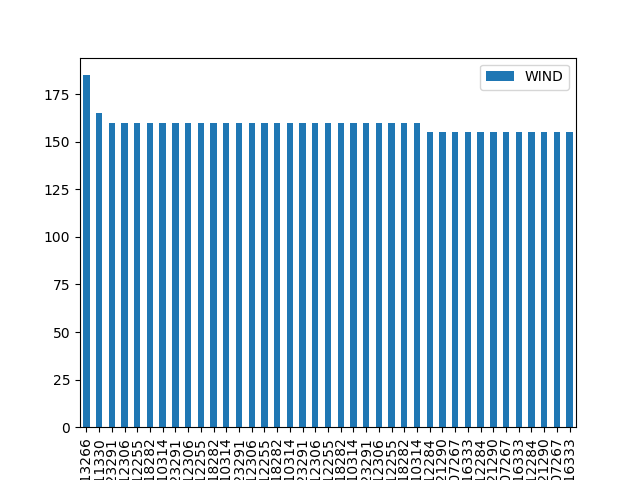

In [110]:
groups.nlargest(10,'WIND').plot.bar()

(6) Plot the count of all datapoints by Basin as a bar chart.

(7) Plot the count of unique hurricanes by Basin as a bar chart.

(8) Make a hexbin plot of the location of datapoints in Latitude and Longitude.

(9) Find Hurricane Dorian (from 2019) and plot its track as a scatter plot

- First find the SID of this hurricane.

- Next get this hurricane’s group and plot its position as a scatter plot. Use wind speed to color the points.

(10) Make time the index on your dataframe.

(11) Plot the count of all datapoints per year as a timeseries.

(12) Plot all tracks from the North Atlantic in 2005. You will probably have to iterate through a GroupBy object

(13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic (“NA”) Basin. Use this for the rest of the assignment.

(14) Plot the number of datapoints per day from this filtered dataframe. Make sure you figure is big enough to actually see the plot.

(15) Calculate the climatology of datapoint counts as a function of dayofyear. Plot the mean and standard deviation on a single figure.

**Add on:**   
(16) Plot the hurricane tracks of a basin of  your choice for a time period of your choice over the wolrd map using the python package `cartopy`.